# Create Neo4j Database

### Retrieve Required Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
import pandas as pd
import pickle
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import random
from pprint import pprint

In [3]:
def normalize_text(text):
    # Lowercase every words
    text = text.lower()
    # Get rid of the punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Get rid of these specific punctuations
    text = re.sub('[‘’“”…]', '', text)
    # Get rid of '\n'
    text = re.sub('\n', '', text)
    return text

In [4]:
# User comedian matrix
matrix_filename = 'full_user_comedian_matrix_OriginalPolarity.pkl'
ucm_df = pd.read_pickle(matrix_filename)
ucm_df.index = [normalize_text(t) for t in ucm_df.index]
ucm_df.columns = [normalize_text(t) for t in ucm_df.columns]
ucm_df

,amy schumer,andy woodhull,arsenio hall,aziz ansari,bert kreischer,bill burr,chris delia,chris rock,dave chappelle,eric andre,...,ronny chieng,roy wood jr,russell peters,sebastian maniscalco,tiffany haddish,tom segura,trevor noah,urzila carlson,vir das,whitney cummings
moons place © with peter moon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.437500
monstaxgang monbebegang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN
ᒪᗩᗪy ᐯoᒪᗪeᗰoᖇt,NaN,0.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
,NaN,NaN,NaN,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
💥warped💥,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bangzhu,0.520833,0.600000,0.60000,0.0,1.000000,0.6,0.00,0.900,0.15,0.00,...,0.000,0.00,0.60,0.571429,0.45,0.53,0.6,1.00,1.0,0.600000
kevin,1.000000,0.277273,0.72619,0.6,0.600000,0.7,0.55,1.000,0.45,0.77,...,0.125,0.55,0.15,1.000000,0.50,0.00,0.0,0.45,NaN,0.767857
leo,1.000000,0.535714,1.00000,1.0,0.785714,1.0,0.00,0.550,0.55,0.75,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,0.6,0.000000


In [5]:
# Training set
X_train_df = pd.read_pickle('X_train.pkl')
Y_train_df = pd.read_pickle('Y_train.pkl')
train_df = pd.concat([X_train_df, Y_train_df], axis=1)
train_df.Name = train_df.Name.apply(normalize_text)
train_df.Comedian = train_df.Comedian.apply(normalize_text)
train_df.head()

,Name,Comedian,Rating
0,respekt,marc maron,0.250000
1,mais abdullatif,ramy youssef,0.600000
2,benito ramirez,roy wood jr,0.541667
3,quarantinewhile,jo koy,0.633333
4,its me,tom segura,0.700000


In [6]:
# Test set
X_test_df = pd.read_pickle('X_test.pkl')
Y_test_df = pd.read_pickle('Y_test.pkl')
test_df = pd.concat([X_test_df, Y_test_df], axis=1)
test_df.Name = test_df.Name.apply(normalize_text)
test_df.Comedian = test_df.Comedian.apply(normalize_text)
test_df.head()

,Name,Comedian,Rating
0,nik d,kenny sebastian,1.000000
1,mr 79,chris rock,0.571667
2,satish rengarajan,joe rogan,0.400000
3,maliah h,iliza shlesinger,0.450000
4,goliath3719,whitney cummings,0.066667


In [7]:
train_df.describe()

,Rating
count,7257.000000
mean,0.604469
std,0.246072
min,0.000000
25%,0.435000
50%,0.600000
75%,0.770000
max,1.000000


In [8]:
train_df[train_df['Rating']>=0].shape

(7257, 3)

In [9]:
test_df[test_df.Rating>=0].shape

(1815, 3)

In [10]:
# Comedian Properties
cp_df = pd.read_excel('ComedianProperties.xlsx')
# Categorize the year of birth of the comedians
cp_df['year group'] = cp_df.year.apply(lambda x: str(x)[:3]+'0s')
# Remove unnecessary columns
cp_df = cp_df.drop(['spouseLabel','children_number','birthdate','year'], axis=1)
# change column names
cp_df.columns = ['Comedian','Citizenship','Ethnicity','Married','Gender','Year']
# Numerize Married Column
cp_df.Married = cp_df.Married.apply(lambda x: str(x))
# Normalize comedian names
cp_df.Comedian = cp_df['Comedian'].apply(normalize_text)
# Set index to comedian
cp_df = cp_df.set_index(cp_df['Comedian'])
# Drop Comedian Column
cp_df = cp_df.drop('Comedian', axis=1)
cp_df.head()

,Citizenship,Ethnicity,Married,Gender,Year
Comedian,,,,,
andy woodhull,United States of America,White,True,male,1980s
ramy youssef,United States of America,Egyptian-American Muslim,False,male,1990s
amy schumer,United States of America,American Jews,True,female,1980s
arsenio hall,United States of America,African Americans,False,male,1950s
aziz ansari,United States of America,Tamil American,False,male,1980s


#### Some comedians have multiple ethnicities

In [11]:
# First extract all kinds of ethnicity
ethnicities = dict()
for e_list in cp_df.Ethnicity.unique():
    for e in e_list.split(','):
        if e.strip() not in ethnicities:
            ethnicities[e.strip()] = len(ethnicities.keys())
        
# Assgin a encoding to each comedian
def encode_ethnicity(text):
    encode = [0 for i in range(len(ethnicities))]
    for e in text.split(','):
        if e.strip() in ethnicities:
            encode[ethnicities[e.strip()]] = 1
    return encode
    
ethnicity_df = cp_df['Ethnicity'].apply(encode_ethnicity)
ethnicity_df = ethnicity_df.apply(pd.Series)
ethnicity_df.columns = [f"Ethnicity_{c}" for c in ethnicity_df.columns]
ethnicity_df.head()

,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8,Ethnicity_9,...,Ethnicity_18,Ethnicity_19,Ethnicity_20,Ethnicity_21,Ethnicity_22,Ethnicity_23,Ethnicity_24,Ethnicity_25,Ethnicity_26,Ethnicity_27
Comedian,,,,,,,,,,,,,,,,,,,,,
andy woodhull,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ramy youssef,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amy schumer,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arsenio hall,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aziz ansari,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
cp_df2 = cp_df.drop('Ethnicity', axis=1)
cp_dummy = pd.get_dummies(cp_df2, drop_first=True)
cp_dummy.head()

,Citizenship_Canada,Citizenship_India,Citizenship_New Zealand,Citizenship_People's Republic of China,Citizenship_Philippines,Citizenship_South Africa,Citizenship_United Kingdom,Citizenship_United States of America,Married_True,Gender_male,Year_1950s,Year_1960s,Year_1970s,Year_1980s,Year_1990s
Comedian,,,,,,,,,,,,,,,
andy woodhull,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
ramy youssef,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
amy schumer,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
arsenio hall,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
aziz ansari,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [13]:
# Append ethnicity back 
cp_dummy = pd.concat([cp_dummy, ethnicity_df], axis=1)
cp_dummy.head()

,Citizenship_Canada,Citizenship_India,Citizenship_New Zealand,Citizenship_People's Republic of China,Citizenship_Philippines,Citizenship_South Africa,Citizenship_United Kingdom,Citizenship_United States of America,Married_True,Gender_male,...,Ethnicity_18,Ethnicity_19,Ethnicity_20,Ethnicity_21,Ethnicity_22,Ethnicity_23,Ethnicity_24,Ethnicity_25,Ethnicity_26,Ethnicity_27
Comedian,,,,,,,,,,,,,,,,,,,,,
andy woodhull,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ramy youssef,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
amy schumer,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
arsenio hall,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
aziz ansari,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Comedian & keywords
kw_df = pd.read_excel('keywords_clean.xlsx',index_col=0)
kw_df.Comedian = kw_df.Comedian.apply(normalize_text)
kw_df.head()

,Comedian,Keywords
0,amy schumer,"right peopl hand wa like okay fuck, thi, guy, ..."
1,andy woodhull,"thi, like, want, know, thing, late everyth tim..."
2,arsenio hall,"know wa, shit, fuck, motherfuck, thi, like gav..."
3,aziz ansari,"excus thi, thing, seen stuff gener like video,..."
4,bert kreischer,"goe, wa, room peopl like dont, got, way thi, w..."


In [15]:
# Users and Comedians 
users = train_df.Name.unique()
comedians = train_df.Comedian.unique()

### Build the graph in neo4j

In [16]:
from py2neo import Graph, Node, Relationship

#### Neeed to have Neo4j Desktop installed to run this program

In [17]:
def switch_database(database):
    host = "localhost"
    password = "0000"
    graph = Graph(host=host, password=password, name=database) 
    return graph
    

In [19]:
switch_database('neo4j')

Graph('bolt://neo4j@localhost:7687', name='neo4j')

In [20]:
def create_graph(database = 'neo4j', recreate = True, weigh_links = False):    
    graph = switch_database(database)
    
    if recreate:
        # Delete all nodes and relationships
        DELETE_QUERY = "MATCH (n) DETACH DELETE n"
        _ = graph.run(DELETE_QUERY)
    
    # Add all user nodes
    for user in users:
        graph.run("""
        MERGE (:User{name: $user})
        """, user=user)
        
    # Add all comedian nodes
    for comedian in comedians:
        properties = cp_df.loc[comedian]
        graph.run("""
        MERGE (:Comedian{name: $comedian, 
                          ethnicity: $ethnicity,
                          married: $married,
                          gender: $gender,
                          year: $year})
            """,comedian=comedian,
                citizenship=properties['Citizenship'],
                ethnicity=properties['Ethnicity'],
                married=properties['Married'],
                gender=properties['Gender'],
                year=properties['Year'])
        
    # Build relationships for users and comedians
    for k, v in train_df.iterrows():
        u = v['Name']
        c = v['Comedian']
        rating = v['Rating']
        if weigh_links:
            weight = int(rating * 10) + 1 # => rating = 1~11 links
        else:
            weight = 1
        for i in range(weight):
            graph.run("""
            MATCH (u:User{name: $user})
            MATCH (c:Comedian{name: $comedian})
            MERGE (u)-[r:commented_on{rating: $rr, index: $id}]->(c)""", user=u, comedian=c, rr=rating, id=i)
                
    # Add all keyword nodes
    for i, r in kw_df.iterrows():
        comedian = r.Comedian
        keywords = r.Keywords.split(',')
        for word in keywords:
            graph.run("""
            MERGE (k:Keyword{word: $word})
            """, word=word)
            graph.run("""
            MATCH (c:Comedian{name: $comedian})
            MATCH (k:Keyword{word: $word})
            MERGE (c)-[:has_keyword]->(k)""", comedian=comedian, word=word)
            
    return graph

In [21]:
# g_base = create_graph()

In [22]:
# g_sc1 = create_graph('scenario1', weigh_links=True)

In [23]:
# g_sc2 = create_graph('scenario2', weigh_links=True)

# Clustering

In [24]:
graph = switch_database('neo4j')

In [25]:
# Retrieve user-id lookup table
query = "MATCH (n:User) RETURN n.name as User"
userID_df = graph.run(query).to_data_frame()

In [26]:
# Retrieve comedian-id lookup table
query = "MATCH (n:Comedian) RETURN n.name as Comedian"
comedianID_df = graph.run(query).to_data_frame()

In [27]:
query="""
MATCH (u:User)-[com1:commented_on]->(c:Comedian)<-[com2:commented_on]-(other:User)
WITH u, other, COLLECT(com1.rating) as r1, COLLECT(com2.rating) as r2

MATCH (u)-[:commented_on]->(uc:Comedian)
WITH u,other, COLLECT(ID(uc)) AS s1, r1, r2
MATCH (other)-[:commented_on]->(oc:Comedian)
WITH u,other, s1, COLLECT(ID(oc)) AS s2, r1, r2

WITH u,other, gds.alpha.similarity.jaccard(s1,s2) as jaccard, gds.alpha.similarity.cosine(r1,r2) as cosine_sim
RETURN u.name AS User1, other.name AS User2, 1 - jaccard * cosine_sim AS weight
"""

user_distance_df = graph.run(query).to_data_frame()

### FastMap

In [28]:
def new_distance(old_dist, xi, xj):
    return np.sqrt(old_dist**2 - (xi-xj)**2)


def law_of_cosine(ai, bi, ab):
    return (ai**2 + ab**2 - bi**2) / (2*ab)


def fastmap(words, data_matrix, dim=2):
    # the first column is all zeros to facilitate the calculation, and the return will omit the first column.
    points = np.zeros((len(words), dim+1))
    for d in range(dim):
        # Step 1: Find the farthest pair heuristically
        # -- Step 1.1: randomly choose a point along with its farthest counterpart.
        current_p = random.randint(0, len(words) - 1)
        previous_p = current_p
        farthest_p = np.argmax([new_distance(data_matrix[current_p, i], points[i, d], points[current_p, d]) for i in range(len(words))])
        # -- Step 1.2: Make farthest point the current point and find its farthest counterpart recursively,
        # until the two points are mutully farthest.
        while previous_p != farthest_p:
            previous_p = current_p
            current_p = farthest_p
            farthest_p = np.argmax([new_distance(data_matrix[current_p, i], points[i, d], points[current_p, d]) for i in range(len(words))])

        # Step 2: Make the farthest pair on the same axis, and use the law of cosine to determine the corrdinations
        # for other points
        d_ab = new_distance(data_matrix[current_p, farthest_p], points[current_p, d], points[farthest_p, d])
        for i in range(len(words)):
            if i == current_p:
                points[i, d+1] = 0
            if i == farthest_p:
                points[i, d+1] = d_ab
            else:
                d_ai = new_distance(data_matrix[current_p, i], points[current_p, d], points[i, d])
                d_bi = new_distance(data_matrix[i, farthest_p], points[i, d], points[farthest_p, d])
                xi = law_of_cosine(d_ai, d_bi, d_ab)
                points[i, d+1] = xi
    return np.array(points[:, 1:])

In [29]:
user_dict = dict(zip(userID_df['User'],userID_df.index))

In [31]:
def plot_fastmap(fastmap_result, labels):
    """
    Plots the words on a 2D plane using FastMap solution.
    """
    fig = plt.figure(figsize=(10,10))
    # Plot the points
    plt.scatter(fastmap_result[:, 0], fastmap_result[:, 1])
#     plt.xlim([0.45, 0.55])
#     plt.ylim([0.45, 0.55])
    # annotation
#     for p in range(len(labels)):
#         plt.text(fastmap_result[p, 0], fastmap_result[p, 1], labels[p])
    plt.plot()

In [32]:
user_distance_df['U1'] = user_distance_df['User1'].apply(lambda x: user_dict[x])
user_distance_df['U2'] = user_distance_df['User2'].apply(lambda x: user_dict[x])
user_distance_df.head()

,User1,User2,weight,U1,U2
0,goldplatinumx,liqu1d16,0.833333,445,411
1,sampson tendai mutsago,liqu1d16,0.916667,684,411
2,saravanesh raja,liqu1d16,0.923077,42,411
3,miles boehmer,liqu1d16,0.877565,345,411
4,itsyagirll,liqu1d16,0.821070,506,411


In [33]:
user_distance_matrix = user_distance_df.pivot_table(index=['U1'], columns=['U2'],values=['weight'])
rename_columns = [c[1] for c in user_distance_matrix.columns]
user_distance_matrix.columns = rename_columns
user_distance_matrix = user_distance_matrix.fillna(1) - np.eye(len(user_distance_matrix))
user_distance_matrix

,0,1,2,3,4,5,6,7,8,9,...,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068
U1,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.858170,0.866893,0.837823,0.941176,0.874235,1.000000,0.824063,0.937500,0.804482,...,0.923077,0.928571,0.933333,0.907433,0.876384,0.933333,0.933333,0.846500,0.880239,0.937500
1,0.858170,0.000000,0.591065,0.862818,0.868561,0.820214,0.909091,0.672594,0.833562,0.831994,...,0.888889,0.900000,0.551762,0.916667,0.729760,0.800447,0.676202,0.637946,0.667173,0.827462
2,0.866893,0.591065,0.000000,0.792933,0.751106,0.923077,0.832945,0.713580,0.836148,0.683514,...,0.900000,0.803043,0.614314,0.742819,0.764305,0.826145,0.819454,0.672122,0.806031,0.834018
3,0.837823,0.862818,0.792933,0.000000,0.805081,0.937500,0.866496,0.774675,0.702297,0.800170,...,0.923077,0.928571,0.783681,0.866731,0.823770,0.791812,0.679175,0.750803,0.753822,0.866763
4,0.941176,0.868561,0.751106,0.805081,0.000000,1.000000,0.923077,0.747483,0.852073,0.851208,...,0.801878,0.862038,0.847266,0.928571,0.887150,0.864690,0.923077,0.916667,0.825392,0.851721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,0.933333,0.800447,0.826145,0.791812,0.864690,0.820984,0.909091,0.778273,0.721886,0.836293,...,0.888889,0.781613,0.852677,0.916667,0.728304,0.000000,0.800343,0.688760,0.809773,0.831678
1065,0.933333,0.676202,0.819454,0.679175,0.923077,0.916667,0.816377,0.777308,0.704575,0.837195,...,1.000000,0.900000,0.691071,0.916667,0.743324,0.800343,0.000000,0.900000,0.900000,0.916667
1066,0.846500,0.637946,0.672122,0.750803,0.916667,0.804855,0.900000,0.754581,0.802562,0.821658,...,0.875000,0.888889,0.797261,0.801860,0.766274,0.688760,0.900000,0.000000,0.581899,0.800447


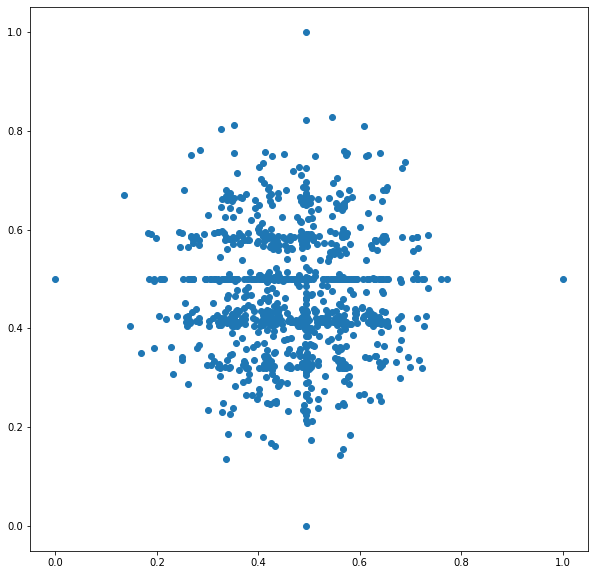

In [39]:
users = user_distance_df.User1.unique()
result = fastmap(users, user_distance_matrix.to_numpy())
plot_fastmap(result, users)

### KNN

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
def knn(data, k=4):
    model = KMeans(n_clusters=k)
    model.fit(data)
    groups = model.labels_  
    color = ['blue', 'green', 'cyan', 'red', 'purple','black']
    fig = plt.figure(figsize=(7, 7))
    for i, g in enumerate(groups):
        plt.scatter(data[i, 0],data[i,1],color=color[g])
    plt.show()
    return model

In [42]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(result)
    sse.append(kmeans.inertia_)

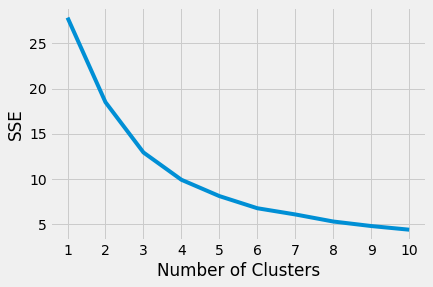

In [43]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse) 
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [44]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(result)
    score = silhouette_score(result, kmeans.labels_)
    silhouette_coefficients.append(score)

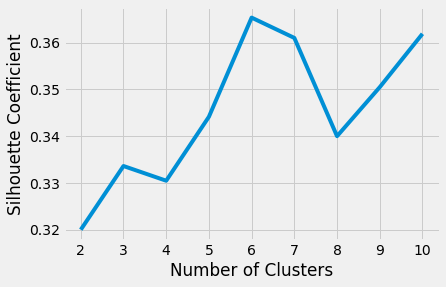

In [45]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

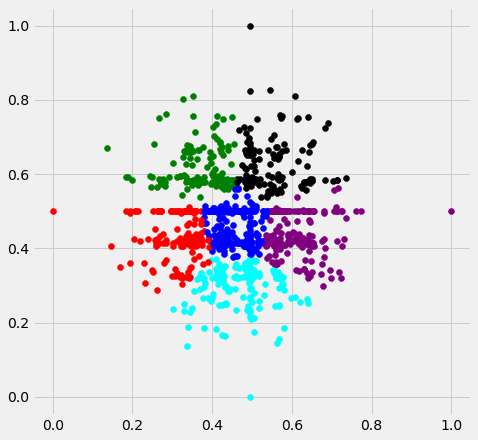

In [46]:
knn_model = knn(result, 6)

In [47]:
user_group = pd.DataFrame(knn_model.labels_, columns=['Group'])
user_group['User'] = userID_df['User']
user_group.tail()

,Group,User
1064,2,babygirl maya
1065,0,kuku khan
1066,0,glenn davey
1067,0,racer z
1068,0,john walls


In [48]:
user_group.to_pickle('user_group.pkl')

#### use the user group from knn

In [49]:
user_group = pd.read_pickle('user_group.pkl')
user_group.head()

,Group,User
0,1,respekt
1,2,mais abdullatif
2,4,benito ramirez
3,5,quarantinewhile
4,4,its me


In [50]:
# Retrieve user-id lookup table
graph = switch_database('scenario2')
query = "MATCH (n:User) RETURN ID(n) as u_id, n.name as name"
users = graph.run(query).to_data_frame()
users

,u_id,name
0,0,kay siekkinen
1,1,pratik suryawanshi
2,2,tony soza
3,3,chetna pandey
4,4,сухое молоко
...,...,...
1064,8067,andrew green
1065,8068,smurf unkown
1066,8069,indigo blue
1067,8070,j garcia


In [51]:
users_extend = users.merge(user_group, left_on='name',right_on='User')
users_extend

,u_id,name,Group,User
0,0,kay siekkinen,4,kay siekkinen
1,1,pratik suryawanshi,1,pratik suryawanshi
2,2,tony soza,3,tony soza
3,3,chetna pandey,0,chetna pandey
4,4,сухое молоко,0,сухое молоко
...,...,...,...,...
1064,8067,andrew green,5,andrew green
1065,8068,smurf unkown,3,smurf unkown
1066,8069,indigo blue,0,indigo blue
1067,8070,j garcia,3,j garcia


In [52]:
users_extend = users_extend[['u_id','name','Group']]
users_extend.head()

,u_id,name,Group
0,0,kay siekkinen,4
1,1,pratik suryawanshi,1
2,2,tony soza,3
3,3,chetna pandey,0
4,4,сухое молоко,0


In [53]:
# Build group nodes in the graph 
graph = switch_database('scenario2')
for i, row in users_extend.iterrows():    
    query="""
    MATCH (u:User{name: $user})
    MERGE (g:Group{group: $group})
    MERGE (u)-[:belongs_to]->(g)
    """
    graph.run(query, user=row['name'], group=row['Group'])

# Prediction

In [54]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [55]:
# Load training and test dataset
x_train_df = pd.read_pickle('X_train.pkl')
x_test_df = pd.read_pickle('X_test.pkl')
y_train_df = pd.read_pickle('Y_train.pkl')
y_test_df = pd.read_pickle('Y_test.pkl')

In [56]:
x_train_df.Name = x_train_df.Name.apply(normalize_text)
x_train_df.Comedian = x_train_df.Comedian.apply(normalize_text)
x_test_df.Name = x_test_df.Name.apply(normalize_text)
x_test_df.Comedian = x_test_df.Comedian.apply(normalize_text)

### Apply node2vec

In [57]:
graph = switch_database('scenario1')

In [58]:
def node2vec(graph, first_time=True):
    if not first_time:
        query = "CALL gds.graph.drop('MyGraph')"
        graph.run(query)

    query = "CALL gds.graph.create('MyGraph', '*', '*')"
    graph.run(query)
    query="""
    CALL gds.alpha.node2vec.stream(
    'MyGraph',
    {
      returnFactor: 1.0, // parameter 'p'
      inOutFactor: 2.0,  // parameter 'q'
      embeddingSize: 4  // parameter 'd'
    })"""

    embedding_df = graph.run(query).to_data_frame()
    embedding_df = embedding_df.set_index('nodeId')
    return embedding_df

In [61]:
embedding_df = node2vec(graph, first_time=True)
embedding_df.head()

,embedding
nodeId,
0,"[-0.23547837138175964, -0.6066299676895142, -0..."
1,"[-0.5105105638504028, 0.03187577798962593, -0...."
2,"[-0.10628984868526459, -0.04831639677286148, -..."
3,"[0.7735445499420166, -0.7790041565895081, -0.7..."
4,"[0.2637608051300049, 0.382096529006958, -0.184..."


In [62]:
def get_embedding(node_id):
    return embedding_df.loc[node_id][0]

### Lookup node ids and relationships

In [63]:
# Retrieve comedian-id lookup table
query = "MATCH (n:Comedian) RETURN ID(n) as c_id, n.name as name"
comedianID_df = graph.run(query).to_data_frame()

# Retrieve user-id lookup table
query = "MATCH (n:User) RETURN ID(n) as u_id, n.name as name"
userID_df = graph.run(query).to_data_frame()
    

In [64]:
def map_dataset_id(graph, train_df, test_df):

    train_id = train_df.merge(userID_df, left_on='Name', right_on='name')
    train_id = train_id.merge(comedianID_df, left_on='Comedian', right_on='name')
    train_id = train_id[['u_id','c_id','Rating']]    
    train_id = train_id.rename(columns={'Rating': 'y'})
    
    test_id = test_df.merge(userID_df, left_on='Name', right_on='name')
    test_id = test_id.merge(comedianID_df, left_on='Comedian', right_on='name')
    test_id = test_id[['u_id','c_id','Rating']]    
    test_id = test_id.rename(columns={'Rating': 'y'})
    
    return train_id, test_id

In [65]:
train_ucID_base, test_ucID_base = map_dataset_id(graph, train_df, test_df)

In [66]:
def comedian_keyword(graph):    
    # query all comedian-keyword id relationships
    query = """
    MATCH (c:Comedian)-[:has_keyword]->(k:Keyword)
    WHERE ID(c) = $comedian_id
    RETURN ID(c) as c_id, COLLECT(DISTINCT ID(k)) as k_id
    """
    ckID_df = pd.DataFrame(columns=['c_id','k_id']) 
    for cid in comedianID_df.c_id:
        result = graph.run(query, comedian_id=cid)
        for k, v in result:
            ckID_df = ckID_df.append({'c_id': k, 'k_id':v}, ignore_index=True)

    # calculate the centroid of keywords for each 
    k_centroid = []
    for k, v in ckID_df.iterrows():
        vector = None
        for k_id in v['k_id']:
            if vector is None:
                vector = get_embedding(k_id)
            else:
                vector = np.add(get_embedding(k_id), vector)
        k_centroid.append(np.divide(vector, len(v['k_id'])))
    ckID_df['k_centroid'] = k_centroid

    # append one-hot encoding comedian properties to the matrix
    c2= cp_dummy.copy()
    c2["c_id"] = c2.index
    c2["c_id"] = c2["c_id"].apply(lambda x: comedianID_df[comedianID_df.name==x].c_id.values[0])
    ckID_merge = ckID_df.merge(c2, on='c_id')   
        
    return ckID_merge

In [67]:
ckID_base = comedian_keyword(graph)

In [68]:
def create_dataset(ucID_df, ckID_df):   
    # Merger this selected df with the ckID_df to append k_centroid
    merge_k_centroid = ucID_df.merge(ckID_df,on='c_id')
    merge_k_centroid = merge_k_centroid.drop('k_id', axis=1)
    
    # Translate u_id and c_id to embedding
    merge_k_centroid.u_id = merge_k_centroid.u_id.apply(get_embedding)
    merge_k_centroid.c_id = merge_k_centroid.c_id.apply(get_embedding)
    
    # Expend all embeddings to columns
    temp_u = merge_k_centroid.u_id.apply(pd.Series)
    temp_u = temp_u.rename(columns = lambda x : 'u' + str(x))
    temp_c = merge_k_centroid.c_id.apply(pd.Series)
    temp_c = temp_c.rename(columns = lambda x : 'c' + str(x))
    temp_k = merge_k_centroid.k_centroid.apply(pd.Series)
    temp_k = temp_k.rename(columns = lambda x : 'k' + str(x))
    
    dataset = pd.concat([merge_k_centroid, temp_u[:], temp_c[:], temp_k[:]], axis=1)
    dataset = dataset.drop(['u_id','c_id','k_centroid'], axis=1)
    return dataset    

In [69]:
train_dataset = create_dataset(train_ucID_base, ckID_base)
train_dataset.to_pickle('train_dataset.pkl')
train_dataset

,y,Citizenship_Canada,Citizenship_India,Citizenship_New Zealand,Citizenship_People's Republic of China,Citizenship_Philippines,Citizenship_South Africa,Citizenship_United Kingdom,Citizenship_United States of America,Married_True,...,u2,u3,c0,c1,c2,c3,k0,k1,k2,k3
0,0.250000,0,0,0,0,0,0,0,1,0,...,-0.390444,-0.675419,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
1,0.550000,0,0,0,0,0,0,0,1,0,...,-0.360477,-0.765145,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
2,0.100000,0,0,0,0,0,0,0,1,0,...,0.664049,-0.713018,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
3,0.450000,0,0,0,0,0,0,0,1,0,...,0.063232,0.254159,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
4,0.812500,0,0,0,0,0,0,0,1,0,...,0.083161,0.019377,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,1.000000,1,0,0,0,0,0,0,0,1,...,0.182872,-0.593645,0.217674,-0.261486,-0.133650,0.011541,0.046115,-0.047731,0.055916,0.013802
7253,0.200000,1,0,0,0,0,0,0,0,1,...,0.119195,-0.661486,0.217674,-0.261486,-0.133650,0.011541,0.046115,-0.047731,0.055916,0.013802
7254,0.132407,1,0,0,0,0,0,0,0,1,...,-0.295193,-0.797162,0.217674,-0.261486,-0.133650,0.011541,0.046115,-0.047731,0.055916,0.013802
7255,0.350000,1,0,0,0,0,0,0,0,1,...,0.175652,0.238564,0.217674,-0.261486,-0.133650,0.011541,0.046115,-0.047731,0.055916,0.013802


In [70]:
test_dataset = create_dataset(test_ucID_base, ckID_base)
test_dataset.to_pickle('test_dataset.pkl')
test_dataset

,y,Citizenship_Canada,Citizenship_India,Citizenship_New Zealand,Citizenship_People's Republic of China,Citizenship_Philippines,Citizenship_South Africa,Citizenship_United Kingdom,Citizenship_United States of America,Married_True,...,u2,u3,c0,c1,c2,c3,k0,k1,k2,k3
0,1.000000,0,1,0,0,0,0,0,0,0,...,-0.740110,-0.131963,-0.026411,0.094950,-0.149453,-0.111354,0.158238,-0.018713,0.038006,-0.020915
1,0.575000,0,1,0,0,0,0,0,0,0,...,-0.276921,-0.591764,-0.026411,0.094950,-0.149453,-0.111354,0.158238,-0.018713,0.038006,-0.020915
2,1.000000,0,1,0,0,0,0,0,0,0,...,-0.821025,0.896007,-0.026411,0.094950,-0.149453,-0.111354,0.158238,-0.018713,0.038006,-0.020915
3,0.525000,0,1,0,0,0,0,0,0,0,...,-0.320386,0.454134,-0.026411,0.094950,-0.149453,-0.111354,0.158238,-0.018713,0.038006,-0.020915
4,0.731250,0,1,0,0,0,0,0,0,0,...,0.539430,0.615333,-0.026411,0.094950,-0.149453,-0.111354,0.158238,-0.018713,0.038006,-0.020915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,1.000000,0,0,0,0,0,0,0,1,0,...,-0.052299,0.778176,0.427452,0.446789,0.294017,-0.126471,0.081804,-0.015232,-0.069388,0.036824
1811,0.356349,0,0,0,0,0,0,0,1,0,...,0.224507,-0.328440,0.427452,0.446789,0.294017,-0.126471,0.081804,-0.015232,-0.069388,0.036824
1812,0.650000,0,0,0,0,0,0,0,1,0,...,0.527670,-0.500892,0.427452,0.446789,0.294017,-0.126471,0.081804,-0.015232,-0.069388,0.036824
1813,0.333333,0,0,0,0,0,0,0,1,0,...,0.039063,0.620009,0.427452,0.446789,0.294017,-0.126471,0.081804,-0.015232,-0.069388,0.036824


### Classification

#### Feature Selection

In [71]:
from sklearn.feature_selection import SelectPercentile

In [72]:
train_dataset_cat = pd.read_pickle('train_dataset.pkl')
train_dataset_cat.y = train_dataset_cat.y.apply(lambda x: 1 if x >= 0.5 else 0)
test_dataset_cat = pd.read_pickle('test_dataset.pkl')
test_dataset_cat.y = test_dataset_cat.y.apply(lambda x: 1 if x >= 0.5 else 0)
train_dataset_cat

,y,Citizenship_Canada,Citizenship_India,Citizenship_New Zealand,Citizenship_People's Republic of China,Citizenship_Philippines,Citizenship_South Africa,Citizenship_United Kingdom,Citizenship_United States of America,Married_True,...,u2,u3,c0,c1,c2,c3,k0,k1,k2,k3
0,0,0,0,0,0,0,0,0,1,0,...,-0.390444,-0.675419,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
1,1,0,0,0,0,0,0,0,1,0,...,-0.360477,-0.765145,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
2,0,0,0,0,0,0,0,0,1,0,...,0.664049,-0.713018,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
3,0,0,0,0,0,0,0,0,1,0,...,0.063232,0.254159,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
4,1,0,0,0,0,0,0,0,1,0,...,0.083161,0.019377,0.108819,-0.240142,-0.113134,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,1,1,0,0,0,0,0,0,0,1,...,0.182872,-0.593645,0.217674,-0.261486,-0.133650,0.011541,0.046115,-0.047731,0.055916,0.013802
7253,0,1,0,0,0,0,0,0,0,1,...,0.119195,-0.661486,0.217674,-0.261486,-0.133650,0.011541,0.046115,-0.047731,0.055916,0.013802
7254,0,1,0,0,0,0,0,0,0,1,...,-0.295193,-0.797162,0.217674,-0.261486,-0.133650,0.011541,0.046115,-0.047731,0.055916,0.013802
7255,0,1,0,0,0,0,0,0,0,1,...,0.175652,0.238564,0.217674,-0.261486,-0.133650,0.011541,0.046115,-0.047731,0.055916,0.013802


In [73]:
X_train = train_dataset_cat.values[:,1:]
Y_train = train_dataset_cat.values[:,0]
X_test = test_dataset_cat.values[:,1:]
Y_test = test_dataset_cat.values[:,0]

In [74]:
select = SelectPercentile(percentile=90)
select.fit(X_train, Y_train)
x_train_selected = select.transform(X_train)
x_test_selected = select.transform(X_test)
pd.DataFrame(x_train_selected)

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.736470,0.778848,0.108819,-0.240142,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,-0.154084,-0.346497,0.108819,-0.240142,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.819263,0.185832,0.108819,-0.240142,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.296443,-0.012263,0.108819,-0.240142,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,-0.173321,0.069364,0.108819,-0.240142,-0.100666,-0.005166,-0.006003,-0.018380,0.010514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.388150,0.779959,0.217674,-0.261486,0.011541,0.046115,-0.047731,0.055916,0.013802
7253,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.381588,0.700815,0.217674,-0.261486,0.011541,0.046115,-0.047731,0.055916,0.013802
7254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.478395,-0.073995,0.217674,-0.261486,0.011541,0.046115,-0.047731,0.055916,0.013802
7255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.653657,-0.597347,0.217674,-0.261486,0.011541,0.046115,-0.047731,0.055916,0.013802


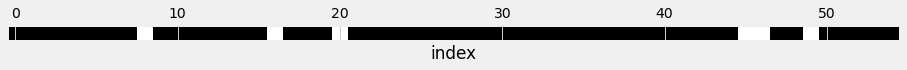

In [75]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel('index')
plt.yticks(());

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [77]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

#### Cross Vaidation

In [78]:
models = []
models.append(('RD', DummyClassifier(strategy='uniform')))
models.append(('LR',make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))))
models.append(('XGB',make_pipeline(StandardScaler(), XGBClassifier())))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=[100,100],activation='logistic')))

In [79]:
names = []
results = []
means = []
sdevs = []
scoring = 'accuracy'

In [80]:
for name,model in models:
    cv_method = StratifiedKFold(n_splits = 20)
    cv_results = cross_val_score(model,x_train_selected,Y_train,cv=cv_method,scoring=scoring)
    results.append(cv_results)
    means.append(cv_results.mean())
    sdevs.append(cv_results.std())
    names.append(name)
    print(f"{name} done.")

RD done.
LR done.
LDA done.
KNN done.
DT done.
RF done.
NB done.
SVM done.
XGB done.
MLP done.


In [81]:
df1 = pd.DataFrame()
df1['name'] = names
df1[f'mean {scoring}'] = means
df1[f'{scoring} std dev'] = sdevs
df1

,name,mean accuracy,accuracy std dev
0,RD,0.505454,0.018391
1,LR,0.544843,0.152802
2,LDA,0.529310,0.149311
3,KNN,0.512784,0.138063
4,DT,0.484654,0.132343
5,RF,0.478201,0.137979
6,NB,0.556538,0.169146
7,SVM,0.529875,0.171155
8,XGB,0.541163,0.157440
9,MLP,0.591145,0.129128


Text(0, 0.5, 'Test accuracy Rate')

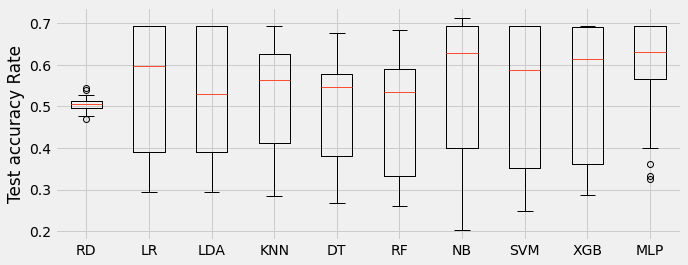

In [82]:
plt.figure(figsize=(10,4))
plt.boxplot(results)
plt.xticks(range(1,11),names)
plt.ylabel(f'Test {scoring} Rate')

### t-score evaluation

In [83]:
from scipy.stats import ttest_ind as ttest

In [84]:
best = results[-1] #MLP
best

array([0.69230769, 0.58677686, 0.32506887, 0.69421488, 0.69421488,
       0.36088154, 0.69421488, 0.69421488, 0.63360882, 0.69421488,
       0.69421488, 0.62809917, 0.69421488, 0.60055096, 0.39944904,
       0.33333333, 0.69337017, 0.60220994, 0.60497238, 0.50276243])

In [85]:
for r, n in zip(results, names):
    # The best model
    if n == 'MLP':
        continue
    print(f"MLP vs. {n}: p-value = {ttest(best, r)[0]}")

MLP vs. RD: p-value = 2.863724191627068
MLP vs. LR: p-value = 1.0088437536728296
MLP vs. LDA: p-value = 1.36540087586521
MLP vs. KNN: p-value = 1.8068615750591106
MLP vs. DT: p-value = 2.5104317961563787
MLP vs. RF: p-value = 2.6051270446728707
MLP vs. NB: p-value = 0.7088590745886192
MLP vs. SVM: p-value = 1.2456508259656085
MLP vs. XGB: p-value = 1.0699634803249942


## Hyperparameter tuning

In [393]:
def evaluate(model, x, y):    
     #Predict training set:
    y_pred = model.predict(x)
        
    #Print model report:
    df = pd.DataFrame(confusion_matrix(y, y_pred), index=[0, 1], columns=[0, 1])
    
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print(f"Precision = {tp/(tp+fp):0.3f}")
    print(f"Recall = {tp/(tp+fn):0.3f}")
    print(f"Accuracy = {(tn+tp)/len(y)}")
    
    return df

#### MLP

In [507]:
from sklearn.neural_network import MLPClassifier

In [508]:
mlp = MLPClassifier(hidden_layer_sizes=[100,100], learning_rate_init=0.001,activation='logistic')
mlp.fit(x_train_selected, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [509]:
evaluate(mlp, x_train_selected, Y_train)

Precision = 0.696
Recall = 0.996
Accuracy = 0.6953286482017362


,0,1
0,31,2190
1,21,5015


In [510]:
evaluate(mlp, x_test_selected, Y_test)

Precision = 0.702
Recall = 0.994
Accuracy = 0.7008264462809918


,0,1
0,11,536
1,7,1261


In [404]:
score = []
x_axis = np.linspace(0.08, 0.5, 20)
for i in x_axis:
    kfold = StratifiedKFold(n_splits=10,random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes=[100,100],learning_rate_init = i, activation='logistic')
    result = cross_val_score(mlp,x_train_selected,Y_train,cv=kfold,scoring="precision")
    score.append(result.mean())

Text(0, 0.5, 'accuracy')

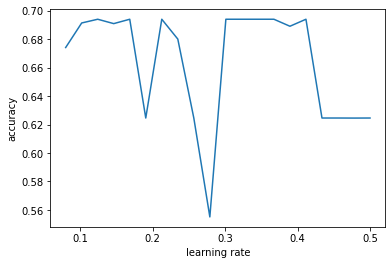

In [405]:
plt.plot(x_axis, score)
plt.xlabel('learning rate')
plt.ylabel('accuracy')

In [406]:
x_axis

array([0.08      , 0.10210526, 0.12421053, 0.14631579, 0.16842105,
       0.19052632, 0.21263158, 0.23473684, 0.25684211, 0.27894737,
       0.30105263, 0.32315789, 0.34526316, 0.36736842, 0.38947368,
       0.41157895, 0.43368421, 0.45578947, 0.47789474, 0.5       ])

In [407]:
score = []
for i in np.linspace(0.00001, 0.01, 20):    
    kfold = StratifiedKFold(n_splits=10,random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes=[100,100],alpha = i, activation='logistic')
    result = cross_val_score(mlp,x_train_selected,Y_train,cv=kfold,scoring="precision")
    score.append(result.mean())

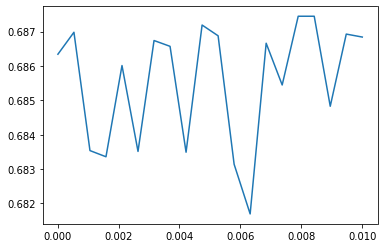

In [408]:
plt.plot(np.linspace(0.00001, 0.01, 20), score)

In [511]:
mlp = MLPClassifier(hidden_layer_sizes=[100,100], alpha=0.008, max_iter=500 ,activation='logistic')
mlp.fit(x_train_selected, Y_train)

MLPClassifier(activation='logistic', alpha=0.008, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [512]:
evaluate(mlp, x_train_selected, Y_train)

Precision = 0.696
Recall = 0.997
Accuracy = 0.6954664461898856


,0,1
0,24,2197
1,13,5023


In [513]:
evaluate(mlp, x_test_selected, Y_test)

Precision = 0.701
Recall = 0.996
Accuracy = 0.7008264462809918


,0,1
0,9,538
1,5,1263


In [514]:
mlp_pred = mlp.predict(x_test_selected)
pickle.dump(mlp_pred, open('scenario1_mlp_pred.pkl', 'wb'))